In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf
import jax.numpy as jnp

In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp2_speech

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [52]:
s5_file='input/child-talking-theres-a-daddy.wav'
s4_file='input/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='input/mathias-words-request.wav'

In [53]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_1124\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [54]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

In [55]:
W, mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0
iteration : 0 : distance 0.21008926630020142
----- MCC = 0.3350223407420951
iteration : 1 : distance 0.0527423620223999
----- MCC = 0.33417504084839794
iteration : 2 : distance 0.0010103583335876465
----- MCC = 0.6677449640507499
iteration : 3 : distance 0.0
----- MCC = 0.6680620210245252
component 1
iteration : 0 : distance 0.6861836612224579
----- MCC = 0.610750863639017
iteration : 1 : distance 8.594989776611328e-05
----- MCC = 0.6673405027637879
iteration : 2 : distance 0.0
----- MCC = 0.6673398488977303
component 2
iteration : 0 : distance 0.390780508518219
----- MCC = 0.6673398886341602
iteration : 1 : distance 0.0
----- MCC = 0.6673398886341602


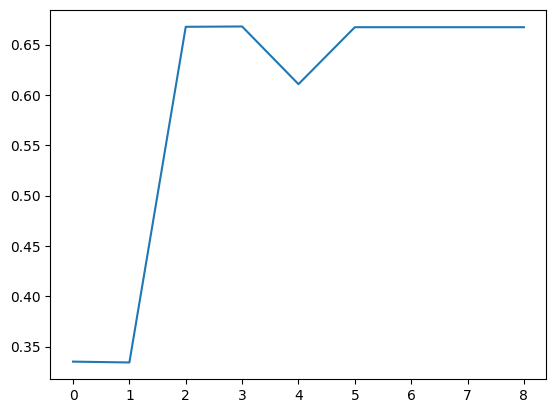

In [56]:
plt.plot(mcc)

In [57]:
unMixed = np.dot(W,Xw)


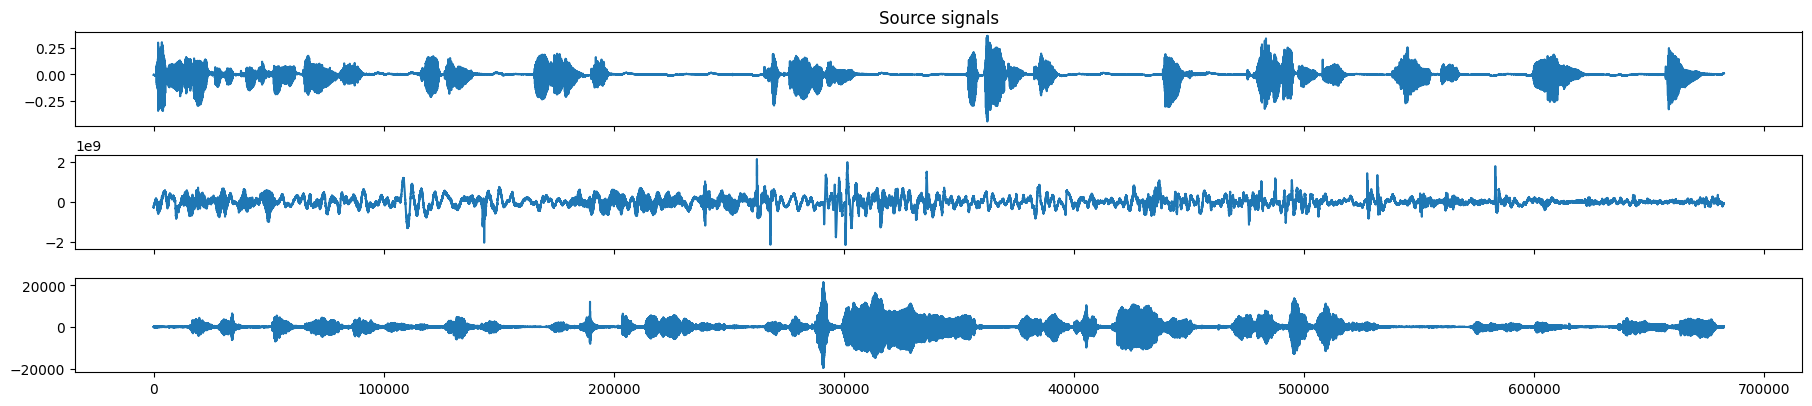

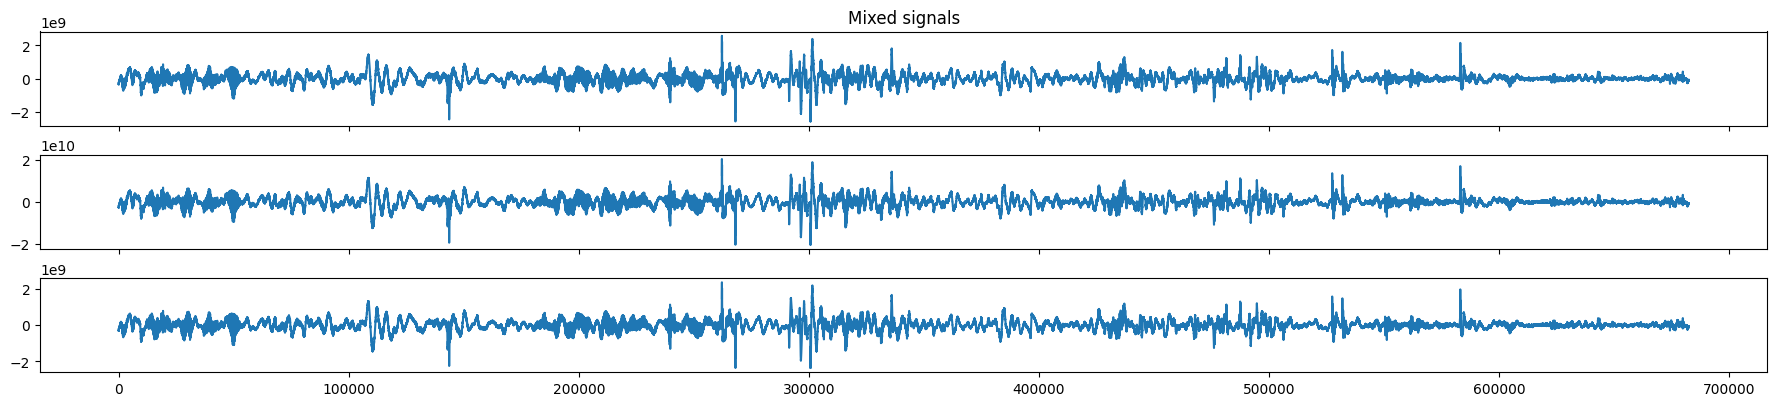

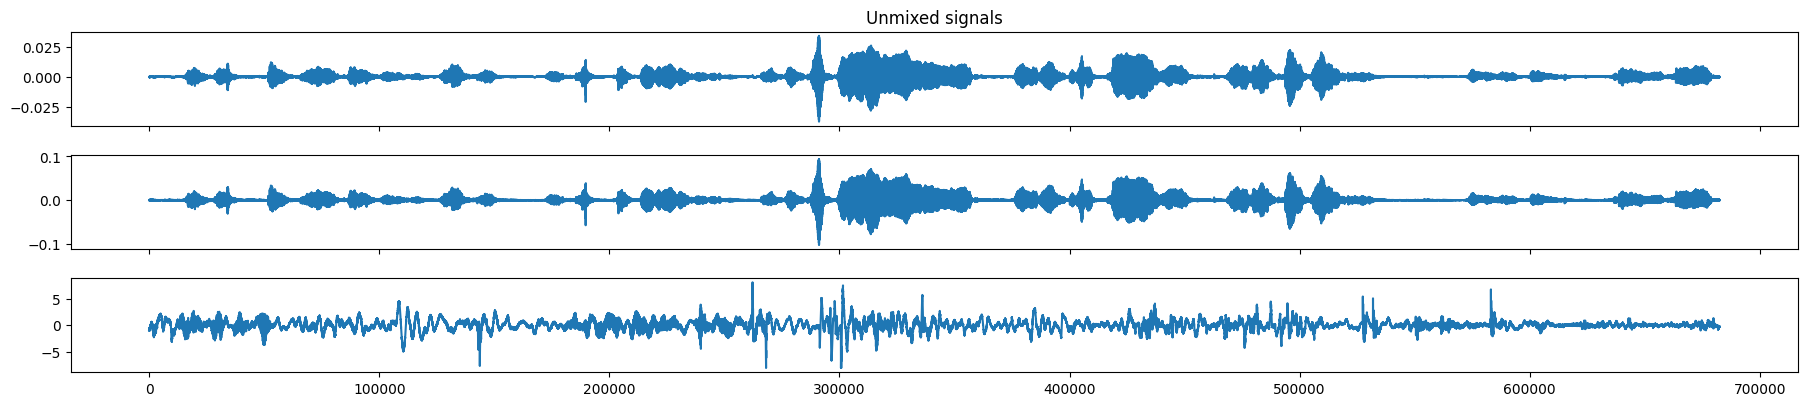

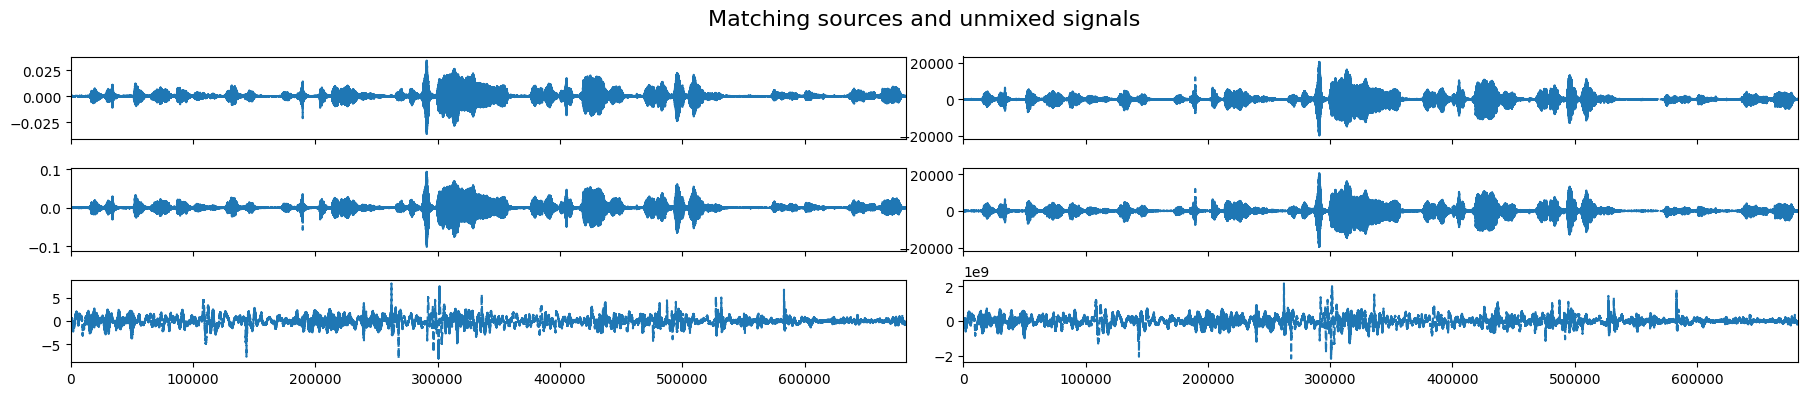

In [59]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)


fig, axes = plt.subplots(nrows=n_signals, ncols=2, figsize=(18, 4),sharex=True)
fig.suptitle('Matching sources and unmixed signals', fontsize=16)
fig.tight_layout()
for i in range(n_signals):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    axes[i,0].plot(unMixed[i,:].T,'--')
    axes[i,1].plot(S[perm].T,'--')
    plt.xlim(0, S.shape[1])


The signal that has very low amplitude is not recovered. We try again but this time we ensure the scaling is the same for all sources the sources beforehand : 

In [60]:
S, X, Xw = mix_sources(S)
W,mcc = fast_ica(Xw, 1, 1e-8, 5000,true_sources=S) #Nour's method.
unMixed = np.dot(W,Xw)


component 0
iteration : 0 : distance 0.05200064182281494
----- MCC = 0.4489568869272868
iteration : 1 : distance 0.013675987720489502
----- MCC = 0.4573293129603068
iteration : 2 : distance 0.0015085339546203613
----- MCC = 0.45809964338938397
iteration : 3 : distance 6.41942024230957e-05
----- MCC = 0.45813318093617755
iteration : 4 : distance 2.2649765014648438e-06
----- MCC = 0.4581347703933716
iteration : 5 : distance 0.0
----- MCC = 0.45813482999801636
component 1
iteration : 0 : distance 0.8876786679029465
----- MCC = 0.699833964308103
iteration : 1 : distance 0.058375775814056396
----- MCC = 0.7366301367680231
iteration : 2 : distance 0.011159896850585938
----- MCC = 0.7407408306996027
iteration : 3 : distance 4.76837158203125e-07
----- MCC = 0.740743433435758
iteration : 4 : distance 5.960464477539063e-08
----- MCC = 0.7407432943582535
iteration : 5 : distance 0.0
----- MCC = 0.7407433340946833
component 2
iteration : 0 : distance 0.7782194763422012
----- MCC = 0.99997897942860

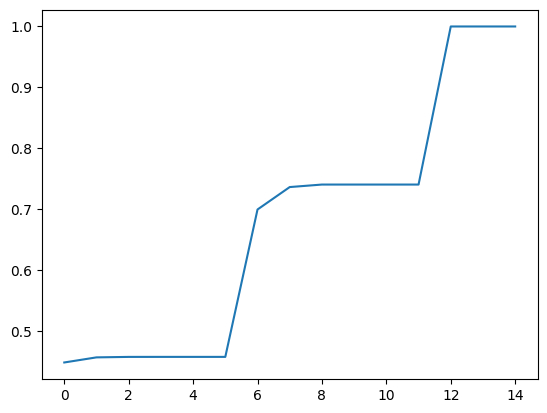

In [61]:
plt.plot(mcc)

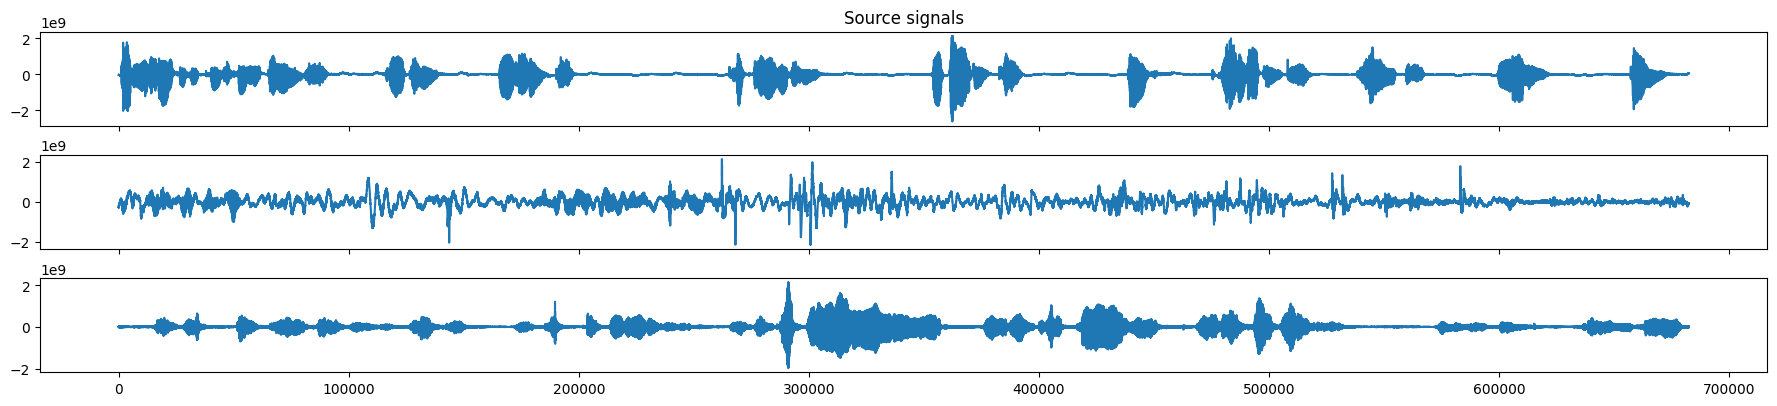

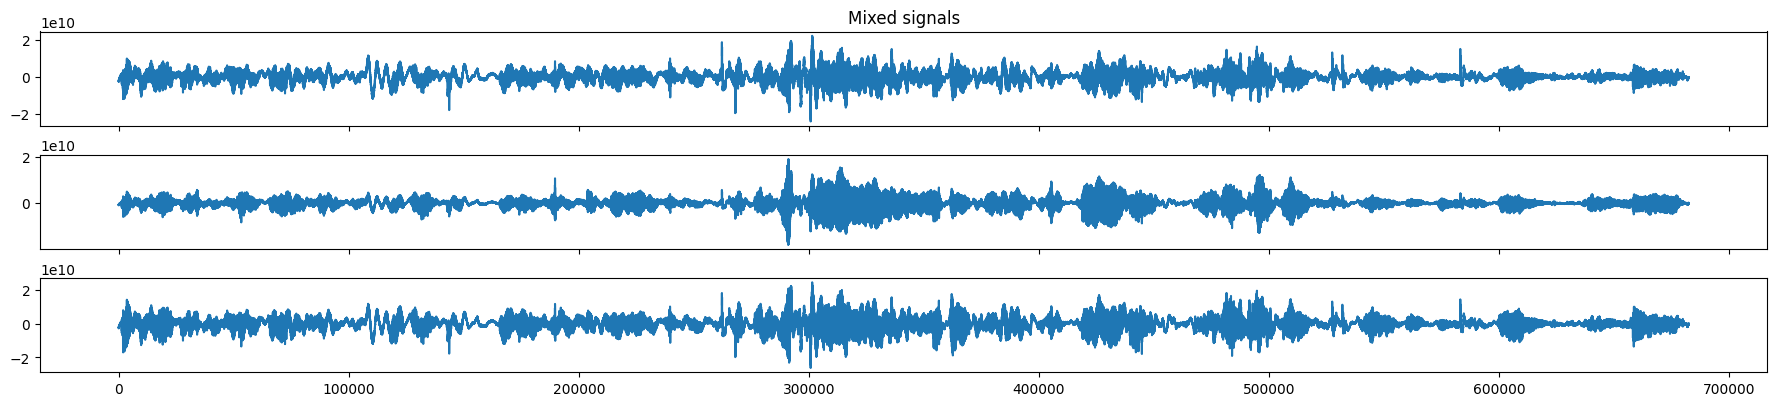

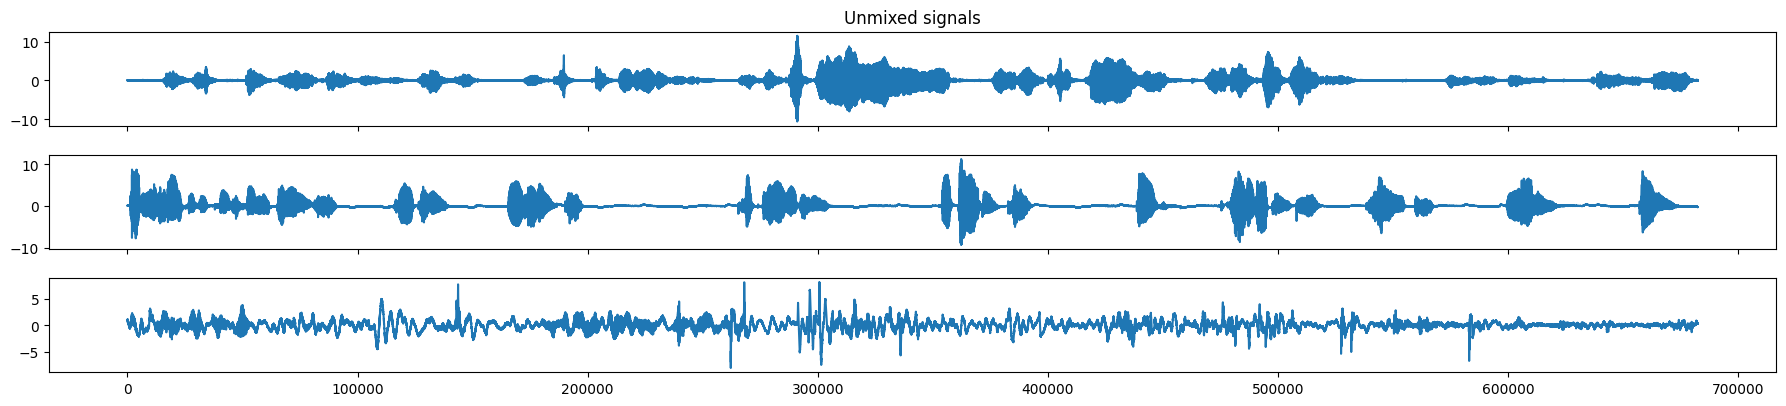

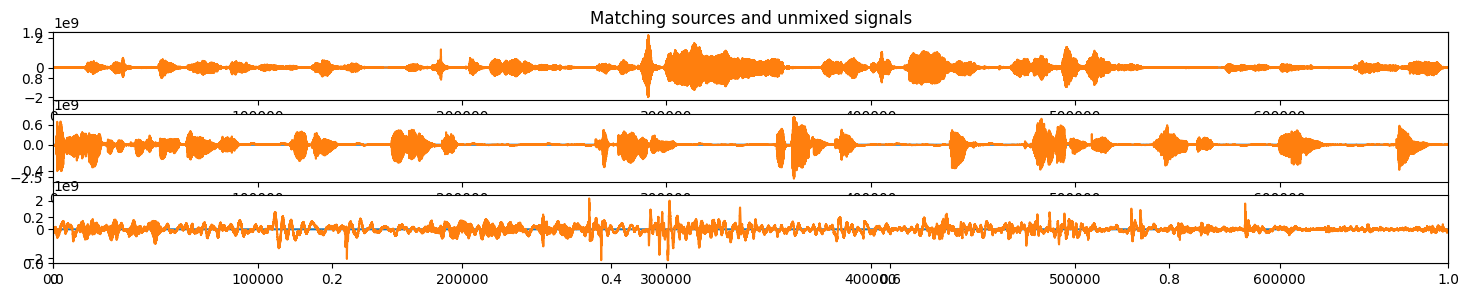

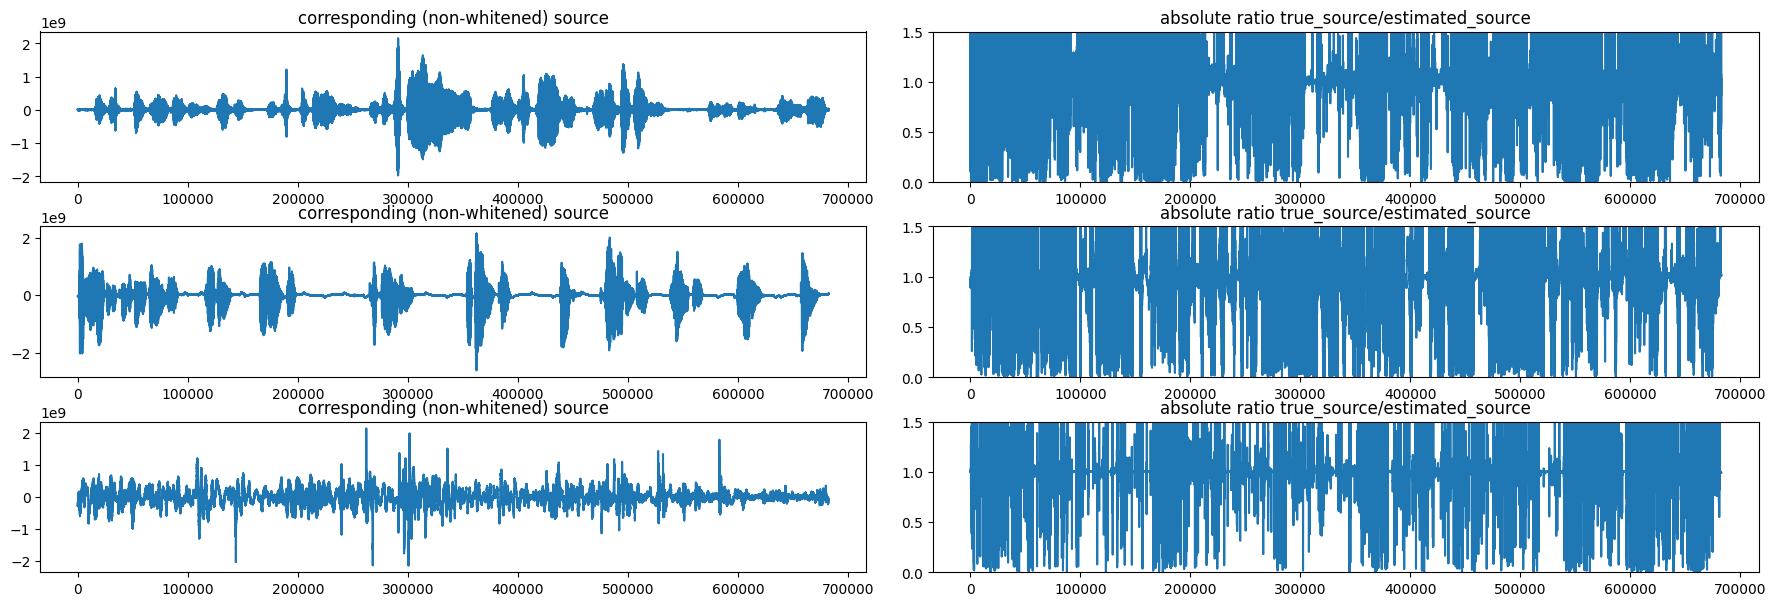

In [63]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)


perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)
fig, axes = plt.subplots(3, 2, figsize=[18, 6])
fig.tight_layout()
for i in range(n_signals):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    axes[i,0].plot(S[perm])
    axes[i,0].set_title('corresponding (non-whitened) source')
    axes[i,1].plot(np.abs(unMixed[i] / Sw[perm]), '-')
    axes[i,1].set_title('absolute ratio true_source/estimated_source')
    axes[i,1].set_ylim(0,1.5)
plt.show()

In [64]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))